# PROGETTO APPLICAZIONE DATA INTENSIVE
#### Bernardini Yuri
#### Matricola 830601

# Caso di Studio: Classificazione di Probabilità di Ictus
- Secondo l' Organizzazione Mondiale della Sanità (OMS), l'ictus è la seconda causa di morte a livello globale.
- E' responsabile del 11% dei decessi totali.
- Utilizzo questo set di dati per prevedere la probabilità che un paziente possa contrarre un Ictus in base ad una serie di informazioni personali, che andrò a spiegare successivamente.
- Il set di dati è stato preso da Kaggle.com, il link è [questo](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).

### Vengono implementati gli import delle principali librerie che andrò ad utilizzare

In [ ]:
import numpy as np
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt

- - Abilito anche il render grafico per jupyter

In [ ]:
%matplotlib inline

In [ ]:
#import warnings #Per togliere i warning 
#warnings.filterwarnings("ignore")

## Caricamento e Comprensione dei dati

In [ ]:
URL = "https://bitbucket.org/YuriBernardini/progettodataintensive/raw/a02eefdc630b5e49268ee0a4ca26904dba47d081/healthcare-dataset-stroke-data.csv"

In [ ]:
data = pd.read_csv(URL, sep = ",")

### Osserviamo le prime 5 colonne e le ultime 5

In [ ]:
data.head(5)

id  gender   age  ...   bmi   smoking_status stroke
0   9046    Male  67.0  ...  36.6  formerly smoked      1
1  51676  Female  61.0  ...   NaN     never smoked      1
2  31112    Male  80.0  ...  32.5     never smoked      1
3  60182  Female  49.0  ...  34.4           smokes      1
4   1665  Female  79.0  ...  24.0     never smoked      1

[5 rows x 12 columns]

In [ ]:
data.tail(5)

id  gender   age  ...   bmi   smoking_status stroke
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5 rows x 12 columns]

### Significato delle Variabili

- <b>id</b>: Identificatore Univoco.
- <b>gender</b>: Genere:
  - "Male": Maschio.
  - "Female": Femmina.
  - "Other": Non specificato.
- <b>age</b>: Età del paziente.
- <b>hypertension</b>: Ipertensione arteriosa:
  - 0: il paziente Non soffre di Ipertensione.
  - 1: il paziente Soffre di Ipertensione.
- <b>heart_disease</b>: Presenza Malattie Cardiache o Cardiopatia:
  - 0: il paziente non ha Malattie Cardiache.
  - 1: il paziente ha una Malattia Cardiache
- <b>ever_married</b>: Il paziente è mai stato Sposato? (Yes / No).
- <b>work_type</b>: Tipologia di Occupazione:
  - "children": Si tratta di un Bambino.
  - "Govt_jov": Lavoro Governativo.
  - "Never_worked": Non ha Mai Lavorato.
  - "Private": Lavoratore Privato, Dipendente.
  - "Self-employed": Lavoratore Autonomo.
- <b>Residence_type</b>: Luogo di Abitazione:
  - "Rural": Campagna.
  - "Urban": Urbana.
- <b>avg_glucose_level</b>: Livello medio Glucosio nel sangue (Glicemia), misurato in mg/dL.
- <b>bmi</b>: Indice Massa Corporea (BMI), è un parametro ottenuto tramite relazione tra peso e statura di un soggetto, noto a livello Mondiale.
- <b>smoking_status</b>: Fumatore: 
  - "formerly smoked": Fumatore Occasionale.
  - "never smoked": Mai fumato.
  - "smokes": Fumatore.
  - "Unknown": Informazione non conosciuta.
- <b>stroke</b>: Infarto: <i>(Variabile da Predire) </i>
  - 1: Il paziente ha avuto un Ictus.
  - 0: il paziente Non ha avuto un Ictus.


### Osserviamo più in dettaglio il Dataset

- Si può notare che si hanno 5110 istanze e 12 colonne.

In [ ]:
data.shape

(5110, 12)

- Mentre i tipi di dato sono i seguenti:

In [ ]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

- Notiamo che i dati <i>gender, ever_married, work_type, Residence_type, smoking_status</i> sono Object.<br>La quantità di dati occupata in memoria è la seguente:

In [ ]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.8 MB


- Sappiamo però che le colonne sopra citate sono Categoriche<br>
quindi ricarico il dataframe assegnando il nuovo tipo.

In [ ]:
custom_dtypes = {
    "gender": "category",
    "ever_married": "category",
    "work_type": "category",
    "Residence_type": "category",
    "smoking_status": "category",
}
data = pd.read_csv(URL, dtype=custom_dtypes, sep=",")

- Naturalmente i dati sono gli stessi

In [ ]:
data.head(5)

id  gender   age  ...   bmi   smoking_status stroke
0   9046    Male  67.0  ...  36.6  formerly smoked      1
1  51676  Female  61.0  ...   NaN     never smoked      1
2  31112    Male  80.0  ...  32.5     never smoked      1
3  60182  Female  49.0  ...  34.4           smokes      1
4   1665  Female  79.0  ...  24.0     never smoked      1

[5 rows x 12 columns]

- Ma lo spazio in memoria è di molto migliorato.

In [ ]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 306.1 KB


- Facendo questo, si è imposto che ad ogni colonna possono essere contenuti solo alcuni specifici valori;
- Ad esempio si visualizza lo stato civile:
  - E' un tipo categorico.
  - I valori possibilit sono Yes/ No.

In [ ]:
data["ever_married"].head(3)

0    Yes
1    Yes
2    Yes
Name: ever_married, dtype: category
Categories (2, object): ['No', 'Yes']

- Inoltre si nota facilmente che la colonna <u>id</u> costituisce l'indice per la tabella.
- Settiamo quindi questa colonna come indice tramite il comando <b>set_index</b>.

In [ ]:
data.set_index("id", inplace=True)

In [ ]:
data.head()

gender   age  hypertension  ...   bmi   smoking_status stroke
id                                 ...                              
9046     Male  67.0             0  ...  36.6  formerly smoked      1
51676  Female  61.0             0  ...   NaN     never smoked      1
31112    Male  80.0             0  ...  32.5     never smoked      1
60182  Female  49.0             0  ...  34.4           smokes      1
1665   Female  79.0             1  ...  24.0     never smoked      1

[5 rows x 11 columns]

## Analisi Esplorativa dei Dati e 'Data Cleaning'

> Utilizziamo la funzione **describe** di Pandas per visualizzare diverse informazioni relative ai dati numerici:
- Numero di istanze.
- Media di ciascuna feature.
- Deviazione standard di ciascuna feature.
- Valore minimo di ogni feauture.
- Valore massimo di ogni feauture.
- Percentili di ciascuna feauture ( 25%, 50% e 75%).
- Valore massimo di ciascuna feature.

In [ ]:
data.describe()

age  hypertension  ...          bmi       stroke
count  5110.000000   5110.000000  ...  4909.000000  5110.000000
mean     43.226614      0.097456  ...    28.893237     0.048728
std      22.612647      0.296607  ...     7.854067     0.215320
min       0.080000      0.000000  ...    10.300000     0.000000
25%      25.000000      0.000000  ...    23.500000     0.000000
50%      45.000000      0.000000  ...    28.100000     0.000000
75%      61.000000      0.000000  ...    33.100000     0.000000
max      82.000000      1.000000  ...    97.600000     1.000000

[8 rows x 6 columns]

- Abbiamo visto che l'<u>età</u> è un numero float, quindi decimale;
- Scelgo di arrotondarla all'intero più vicino.

In [ ]:
data['age'] = data['age'].apply(lambda x : round(x))

In [ ]:
data.describe()

age  hypertension  ...          bmi       stroke
count  5110.000000   5110.000000  ...  4909.000000  5110.000000
mean     43.226614      0.097456  ...    28.893237     0.048728
std      22.612731      0.296607  ...     7.854067     0.215320
min       0.000000      0.000000  ...    10.300000     0.000000
25%      25.000000      0.000000  ...    23.500000     0.000000
50%      45.000000      0.000000  ...    28.100000     0.000000
75%      61.000000      0.000000  ...    33.100000     0.000000
max      82.000000      1.000000  ...    97.600000     1.000000

[8 rows x 6 columns]

- Osservo che un paziente analizzato non ha il genere specificato.

In [ ]:
data["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

- Per semplicità presumo sia un <i>Maschio</i>.

In [ ]:
data.gender = data.gender.replace({'Other': 'Male'})

In [ ]:
data["gender"].value_counts()

Female    2994
Male      2116
Name: gender, dtype: int64

- Inoltre, dopo aver effettuato una ricerca su Google, ho constatato che i valori possibili per l' <u>Indice di Massa Corporea</u> sono i seguenti:<br>
  - Sottopeso severo	< 16,5
  - Sottpeso	da 16,5 a 18,4
  - Normale	da 18,5 a 24,9
  - Sovrappeso	da 25 a 30
  - Obesità primo grado	da 30,1 a 34,9
  - Obesità secondo grado	da 35 a 40
  - Obesità terzo grado	> 40
- Noi però ci ritroviamo alcuni valori dell'indice BMI fuori range;
- Questo può essere stato causato da un errore del macchinario difettoso di misurazione o semplicemente da errori in fase registrazione.
- Quindi, per evitare errori e/o la compromissione del set di dati, imposto i valori <12 o >60 a <i>NaN.</i>

In [ ]:
data['bmi'] = data['bmi'].apply(lambda bmi_value: bmi_value if 12 < bmi_value < 60 else np.nan)

- Verifichiamo quindi presenza di valori nulli all'interno di tutto il mio db.<br>
> Notiamo che sono presenti alcuni valori nulli.<br>
<i>(Il set di dati presentava già inizialmente 201 valori nulli per l'indice BMI;<br>Il precedente passaggio ne ha aggiungi altri 17)</i>.

In [ ]:
data.isnull().values.any()

True

- Osserviamo quindi 218 valori nulli, il che significa che per alcune persone l'indice di massa corporea non è noto.

In [ ]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  218
smoking_status         0
stroke                 0
dtype: int64

- Adesso:
  - Ordino il set di dati in base al Genere, poi in base all'Età<br>
  - Utilizzo banalmente <b>Ffill()</b> di Pandas per completare i valori nulli per l'indice BMI:
    - Questo comando inserisce per il campo vuoto l'informazione più vicina ad esso.

In [ ]:
data.sort_values(['gender', 'age'], inplace=True) 
data.reset_index(drop=True, inplace=True)
data['bmi'].ffill(inplace=True)

- Ora possiamo osservare che non sono più presenti valori nulli.

In [ ]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

- Visualizziamo il numero di pazienti in percentuale che hanno avuto un infarto.
> notiamo che il numero di pazienti che hanno avuto un infarto è circa il 5%. 

- Ci troviamo quindi un dataset <b>Sbilanciato</b>.
- Si applicherà successivamente un metodo per trattare il problema.

In [ ]:
# data["stroke"].value_counts(normalize = True) * 100  # Per vedere la Percentuale
data["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

- Mostriamo lo stesso dato, questa volta in percentuale, in un grafico a torta.

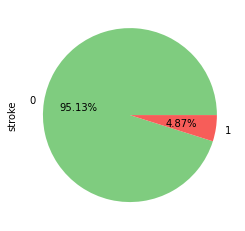

In [ ]:
data["stroke"].value_counts().plot.pie(colors=["#7FCC7F", "#F75D59"], autopct="%1.2f%%");


#### Osserviamo anche altri grafici delle features.

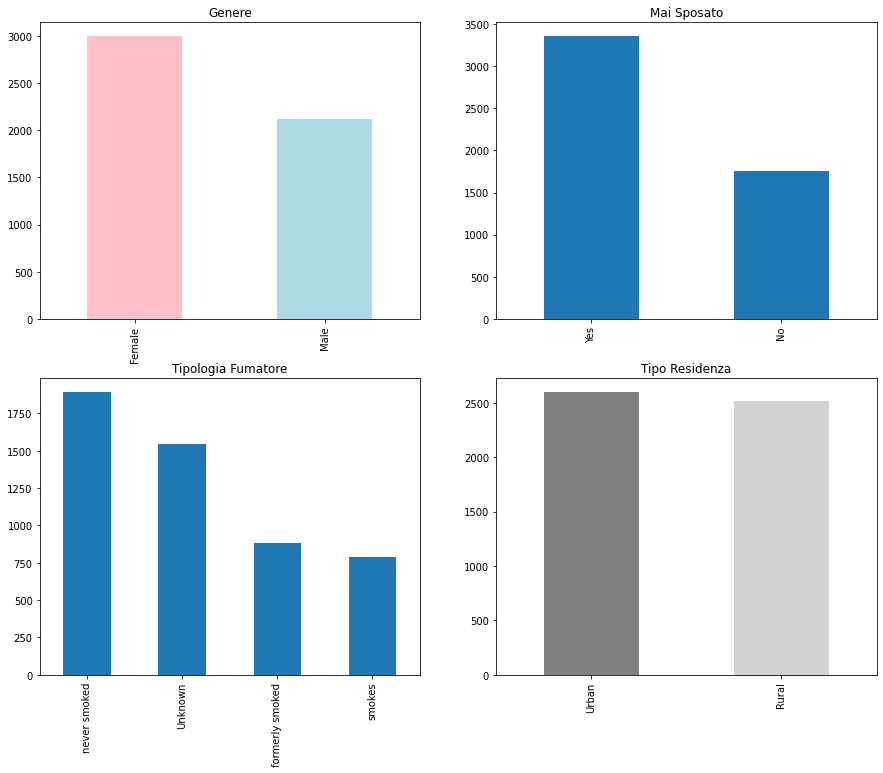

In [ ]:
plt.figure(figsize=(15, 12))
data["gender"].value_counts().plot.bar(ax=plt.subplot(2,2,1), title="Genere", color=["pink", "lightblue"])
data["ever_married"].value_counts().plot.bar(ax=plt.subplot(2,2,2), title="Mai Sposato")
data["smoking_status"].value_counts().plot.bar(ax=plt.subplot(2,2,3), title="Tipologia Fumatore")
data["Residence_type"].value_counts().plot.bar(ax=plt.subplot(2,2,4), title="Tipo Residenza", color=["gray", "lightgray"]);

- Da questi semplici grafici si osserva che:
  - La maggior parte dei pazienti analizzati sono donne.
  - La maggior parte è sposato/a.
  - Solo una minoranza di persone ha dichiarato di fumare.
  - Osservando la residenza si nota che sono equamente suddivisi tra chi vive in città o più in campagna. (Urbani / Rurali).

#### Analizziamo altri 3 grafici:

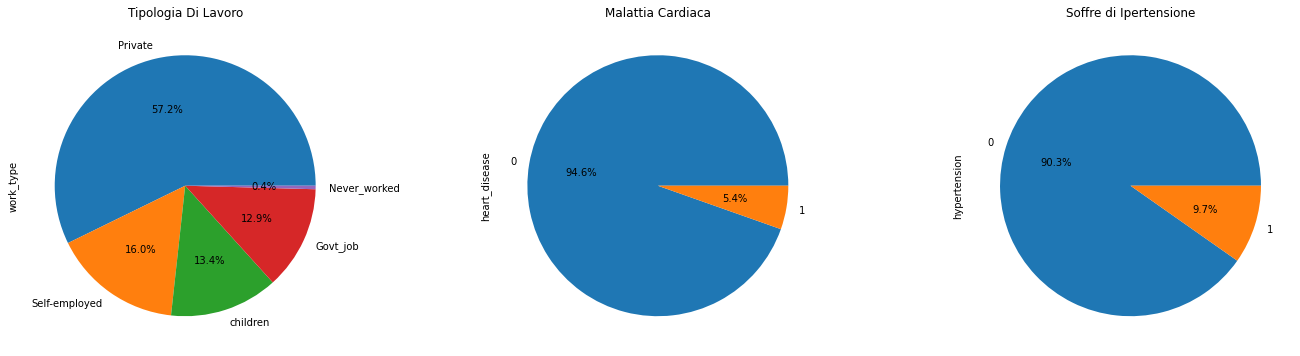

In [ ]:
plt.figure(figsize=(24, 6))
data["work_type"].value_counts().plot.pie(ax=plt.subplot(1,3,1), title="Tipologia Di Lavoro", autopct="%1.1f%%")
data["heart_disease"].value_counts().plot.pie(ax=plt.subplot(1,3,2), title="Malattia Cardiaca", autopct="%1.1f%%")
data["hypertension"].value_counts().plot.pie(ax=plt.subplot(1,3,3), title="Soffre di Ipertensione", autopct="%1.1f%%");

- Dal primo grafico si osserva la tipologia di Occupazione dei Pazienti analizzati.
- Dal secondo che poco più del 5% ha una malattia cardiaca.
- Dal terzo si osserva che circa il 10% dei pazienti soffre di Ipertensione.

#### Imposto un grafico a dispersione con Età ed Indice Di Massa Corporeo, in cui evidenzio in Rosso gli Ictus registrati.

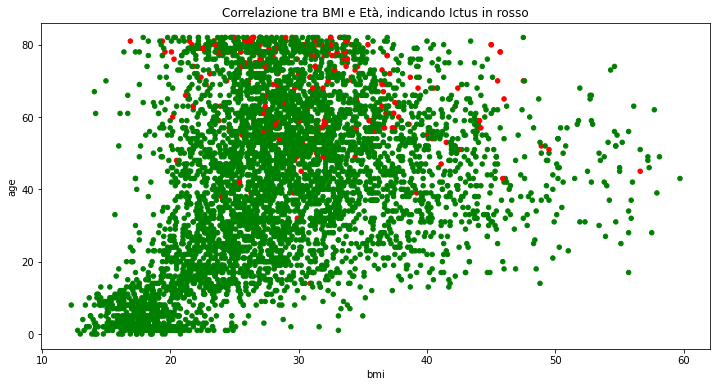

In [ ]:
stroke_colors = { 0: "green", 1: "red"}
data.plot.scatter(x="bmi",
                  y="age", 
                  c=data["stroke"].map(stroke_colors),
                  title="Correlazione tra BMI e Età, indicando Ictus in rosso",
                  figsize=(12,6));

- Dalla correlazione tra l' Età e il BMI possiamo chiaramente notare che le persone di età dai 40 anni in su hanno una possibilità maggiore di contrarre un Ictus.<br>
Questa probabilità dopo l'età di 60 anni aumenta ancora maggiormente.<br>
Inoltre, purtroppo, le persone con indice BMI superiore a 25 hanno una chance superiore delle altre.<br>
- Dunque è chiaro che le persone con più di 40 anni e con indice BMI >25 hanno una probabilità maggiore di contrarre un Ictus.

#### Imposto un grafico similite dove però ora metto a correlazione l'indice do Massa Corporea e il Livellodi Glucosio registrato, sempre evidenziando in rosso gli Ictus.

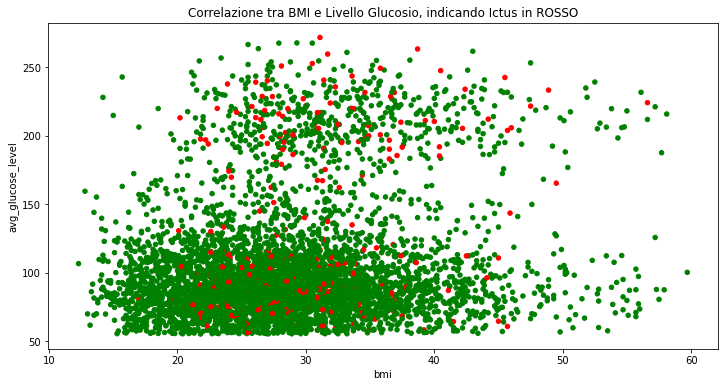

In [ ]:
stroke_colors = { 0: "green", 1: "red"}
data.plot.scatter(x="bmi",
                  y="avg_glucose_level", 
                  c=data["stroke"].map(stroke_colors),
                  title="Correlazione tra BMI e Livello Glucosio, indicando Ictus in ROSSO",
                  figsize=(12,6));

- Premettendo che i livelli ottimali di Glucosio nel sangue è compreso tra 60 e 110 mg/dL<br>
Si può notare che coloro che hanno valori alti, soffrendo quindi di Iperglicemia (ad esempio Diabete o altre malattie legate) hanno una maggiore probabilità di Ictus.
- Sempre come detto dal precedente grafico chi ha un indice BMI > 25 ha più probabilità di Infarti.
- Naturalmente la combinazione di entrambi i casi, ovverto una persona fortemente obesa e che soffre anche di Iperglicemia ha una probabilità molto più alta.

### Correlazione tra le variabili
- Utilizziamo il comando <b>corr()</b>;
  - Questo comando indica, per ciascuna features, quanto essa pesi nel determinare il verificarsi di un <i>Ictus</i> o meno.
- Naturalmente le features non hanno un peso particolarmente alto se prese singolarmente, quindi incidono poco sulla possibilità di contrarre un infarto;

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2) #set_precision(2) = due numeri dopo la virgola

- Si nota che in ordine di incidenza, le features più rilevanti sono:
  - età.
  - ipertensione, malattia cardiaca o glicemia con una stessa percentuale.

- Osserviamo allora se c'è una correlazione tra Età ed Infarti:

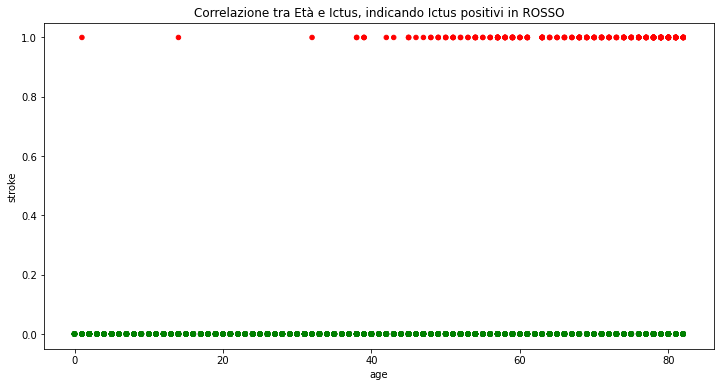

In [ ]:
stroke_colors = { 0: "green", 1: "red"}
data.plot.scatter(x="age",
                  y="stroke", 
                  c=data["stroke"].map(stroke_colors),
                  title="Correlazione tra Età e Ictus, indicando Ictus positivi in ROSSO",
                  figsize=(12,6));

- Si può notare che la maggior parte degli ictus avvengono dopo la soglia dei 45/ 50 anni.

## Preparazione per l'addestramento

In [ ]:
data.head(3)

gender  age  hypertension  ...   bmi smoking_status stroke
0  Female    0             0  ...  16.2        Unknown      0
1  Female    0             0  ...  16.0        Unknown      0
2  Female    0             0  ...  14.1        Unknown      0

[3 rows x 11 columns]

- Il mio modello presenta 2 categorie di dati: **categorici** e **numerici**.
- I metodi di regressione e classificazione più semplici funzionano con variabili predittive numeriche.
- Questi modelli non funzionano in presenza di variabili categoriche.
  - Sarà necessario usare funzioni per trattare il problema.

- Definisco due categorie per gestire i miei tipi di dati.

In [ ]:
numeric_vars = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]
categorical_vars = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

- Ora **Suddividiamo** i dati:
    - Prendiamo come y la variabile <b>stroke</b> cioè quella da predire.
    - Prendiamo come X le altre colonne di mio interesse:

In [ ]:
y = data["stroke"]

X = data.iloc[:, :-1]   

- Osserviamo quindi la composizione della X.

In [ ]:
X.head(3)

gender  age  hypertension  ...  avg_glucose_level   bmi smoking_status
0  Female    0             0  ...              73.71  16.2        Unknown
1  Female    0             0  ...              55.86  16.0        Unknown
2  Female    0             0  ...             139.67  14.1        Unknown

[3 rows x 10 columns]

- E quella della y.

In [ ]:
y.head(3)

0    0
1    0
2    0
Name: stroke, dtype: int64

- Stampiamo anche la <i>dimensione </i>delle 2 variabili.

In [ ]:
y.shape, X.shape

((5110,), (5110, 10))


- Ora suddividiamo i dati in **training set** e **validation set**.
- Utilizziamo 2/3 dei dati per l'addestramento e 1/3 dei dati per il validation.
- Utilizzo un **random_state** per la riproducibilità dei dati.



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y,             # dati da suddividere
    test_size=1/3,    # proporzione: 2/3 training, 1/3 validation
    random_state=42   # seed per la riproducibilità
)

- Osserviamo cosi la composizione del Training Set.

In [ ]:
X_train.shape, y_train.shape

((3406, 10), (3406,))

In [ ]:
pd.DataFrame(y_train)["stroke"].value_counts()

0    3236
1     170
Name: stroke, dtype: int64

- E quella del Validation.

In [ ]:
X_val.shape, y_val.shape

((1704, 10), (1704,))

In [ ]:
pd.DataFrame(y_val)["stroke"].value_counts()

0    1625
1      79
Name: stroke, dtype: int64

### Come trattare le mie variabili Categoriche


#### Osserviamo come funziona il metodo OneHotEncoder

In [ ]:
X_train_cat = X_train[categorical_vars]
X_train_num = X_train[numeric_vars]

- Importiamo la classe **OneHotEncoder** che mi servirà per gestire le variabili categoriche come numeriche.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

- Creiamo un <b>encoder</b>; 
- Osserviamo il suo comportamento <b>a scopo dimostrativo</b>.
  - `sparse=False` indica di generare dei normali array NumPy.

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoder.fit_transform(X_train_cat)

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

- Vediamo che l'**encoder crea una colonna binaria per ogni valore categorico**.

In [ ]:
encoder.get_feature_names()

array(['x0_Female', 'x0_Male', 'x1_No', 'x1_Yes', 'x2_Govt_job',
       'x2_Never_worked', 'x2_Private', 'x2_Self-employed', 'x2_children',
       'x3_Rural', 'x3_Urban', 'x4_Unknown', 'x4_formerly smoked',
       'x4_never smoked', 'x4_smokes'], dtype=object)

- Assegnamo un nome più leggibile.

In [ ]:
encoder.get_feature_names(X_train_cat.columns)

array(['gender_Female', 'gender_Male', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'], dtype=object)

- Osserviamo quindi cosa accade ai dati categorici dopo aver usato un <b>encoder</b>.

In [ ]:
pd.DataFrame(
    encoder.transform(X_train_cat),
    columns=encoder.get_feature_names(X_train_cat.columns)
).head(5)

gender_Female  ...  smoking_status_smokes
0            1.0  ...                    1.0
1            1.0  ...                    0.0
2            0.0  ...                    0.0
3            0.0  ...                    0.0
4            1.0  ...                    0.0

[5 rows x 15 columns]

### Addestramento sul Primo Modello

- Dopo aver studiato i dati proviamo il primo modello.
- Utilizzo subito una <b>Pipeline</b> per migliorare la leggibilità e compattare il codice.
  - Usiamo anche il filtro <b>ColumnTrasformer</b> per indicare come trattare i miei dati.
  - Otteniamo così un singolo oggetto contenente il modello e i filtri da usare sui dati.
    - Come visto precedentemente utilizzo un **encoder**.
- Per iniziare utilizziamo un <b>Perceptron</b>.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Perceptron

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
preprocessor = ColumnTransformer([
    ("numeric"    , "passthrough" , numeric_vars    ),
    ("categorical", OneHotEncoder() , categorical_vars)
])
model = Pipeline([
    ("preproc", preprocessor),
    ("perceptron" , Perceptron(n_jobs=-1, random_state=42))
])

- Addestriamo il modello.

In [ ]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preproc',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric', 'passthrough',
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('categorical',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
          

- Osserviamo il punteggio ottenuto.

In [ ]:
model.score(X_val, y_val)

0.9530516431924883

- Prima di analizzare il risultato ottenuto, ripeto subito il modello;
  - Questa volta inserisco anche <i>un metodo di standardizzazione per i dati numerici</i>: <b>StandardScaler</b>.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
preprocessor = ColumnTransformer([
    ("numeric"    , StandardScaler() , numeric_vars    ),
    ("categorical", OneHotEncoder() , categorical_vars)
])
model = Pipeline([
    ("preproc", preprocessor),
    ("perceptron" , Perceptron(n_jobs=-1, random_state=42))
])

- Addestro il modello sul training set.

In [ ]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preproc',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('categorical',
                                                  OneHotEncoder(categories='auto',
                                             

- Stampo il punteggio ottenuto.

In [ ]:
model.score(X_val, y_val)

0.8380281690140845

- Osserviamo anche la media delle variabili numeriche.

In [ ]:
pd.Series(
    model.named_steps["preproc"].named_transformers_["numeric"].mean_,
    index=numeric_vars
)

age                   43.397827
hypertension           0.100411
heart_disease          0.054903
avg_glucose_level    106.547522
bmi                   28.863858
dtype: float64

- I Due modelli hanno ottenuto i seguenti punteggi:
  - Perceptron con standardizzazione dati numerici: circa 83%.
  - Perceptron senza standardizzazione dati numerici: circa 95%.
- In questo caso avendo standardizzato le features ho <b>peggiorato</b> il risultato.

- Solitamente questa operazione va a migliorare i modelli.
>  **Ma nel mio caso mi ritrovo in un Dataset SBILANCIATO;<br> Quindi il modello può aver avuto un Abbaglio, <br>L'Accuratezza ottenuta è Sbagliata.**

## Come gestire modelli Sbilanciati - <b>SMOTE</b>.

- Utilizziamo un metodo di **SMOTE**;
- Questo medodo mi crea dati fittizzi per il mio set di training.
- Grazie a questo metodo bilancio la mia classe.
  - Solitamente usando questo metodo, l'accuratezza migliora. 

- Per il mio specifico caso importiamo la funzione <b>SMOTENC</b>, che equivale a SMOTE.
  - Aggiunge però funzioni per trattare dati sia numerici che categorici.
  - SMOTE Numerical-Categorical (SMOTE-NC)

In [ ]:
from imblearn.over_sampling import SMOTENC

- Usiamo la funzione SmoteNC.
  - Gli passo l'indice delle colonne categoriche del mio set di dati.

In [ ]:
smt = SMOTENC(categorical_features=[0,4,5,6,9])

- E la **applico alle variabili di Training.**

In [ ]:
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

- Stampo la nuova composizione dele variabili di training.

In [ ]:
X_train_sm.shape, y_train_sm.shape

((6472, 10), (6472,))

- Osserviamo la composizione della variabile da predire <i>y [ stroke ]</i>.
  - Ora il mio dataset è completamente <b>Bilanciato</b>
  - Abbiamo la stesso numero di casi.

In [ ]:
pd.DataFrame(y_train_sm)[0].value_counts()

1    3236
0    3236
Name: 0, dtype: int64

### 1° caso: Perceptron.

- Riscrivo il modello precedente (**Perceptron**).
- Questa volta utilizzo i miei dati dopo aver applicato la tecnica di SMOTE sul validation set.

In [ ]:
preprocessor = ColumnTransformer([
    ("numeric"    , StandardScaler() , numeric_vars    ),
    ("categorical", OneHotEncoder() , categorical_vars)
])
model_p = Pipeline([
    ("preproc", preprocessor),
    ("perceptron" , Perceptron(n_jobs=-1, random_state=42))
])

- Addestriamo il modello

In [ ]:
#trasformo X_train Smoted in pd Dataframe
X_train_sm = pd.DataFrame(X_train_sm, columns=X_train.columns)
X_train_sm.head(1)

gender age hypertension  ... avg_glucose_level   bmi smoking_status
0  Female  80            0  ...             98.39  22.2         smokes

[1 rows x 10 columns]

In [ ]:
model_p.fit(X_train_sm, y_train_sm)

Pipeline(memory=None,
         steps=[('preproc',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('categorical',
                                                  OneHotEncoder(categories='auto',
                                             

- Osserviamo che anche i pesi delle variabili numeriche sono cambiati.

In [ ]:
pd.Series(
    model_p.named_steps["preproc"].named_transformers_["numeric"].mean_,
    index=numeric_vars
)

age                   55.509491
hypertension           0.189741
heart_disease          0.126118
avg_glucose_level    120.157932
bmi                   29.530488
dtype: float64

- Infine stampiamo l'accuratezza del modello.
  - Notiamo che il risultato è più scarso dei precedenti.
    - Avendo usato una tecnica di <i>Smote</i> l'accuratezza è diminuita.
  - Ma siamo sicuri che <b>ora il modello è più veritiero</b>.

In [ ]:
model_p.score(X_val, y_val)

0.7353286384976526

### 2° caso: <b>LogisticRegression</b>

- Osserviamo se con una Logistic Regression si ottengono migliori risultati.
- Addestriamo quindi un nuovo modello.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
preprocessor = ColumnTransformer([
    ("numeric"    , StandardScaler() , numeric_vars    ),
    ("categorical", OneHotEncoder() , categorical_vars)
])
model_lr = Pipeline([
    ("preproc", preprocessor),
    ("logreg",  LogisticRegression(random_state=42))
])

In [ ]:
model_lr.fit(X_train_sm, y_train_sm)

Pipeline(memory=None,
         steps=[('preproc',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('categorical',
                                                  OneHotEncoder(categories='auto',
                                             

- Osserviamo l'accuratezza.
  - Si nota che l'accuratezza del modello non è molto migliorata rispetto a prima.

In [ ]:
model_lr.score(X_val, y_val)

0.7623239436619719

- Usiamo altri modi per visualizzare l'accuratezza del modello:
  - Confrontando le classi predette da un classificatore su un set di dati con quelle reali, possiamo ottenere una **_matrice di confusione_**
  - Ogni cella in riga i e colonna j indica quanti esempi della classe i-esima sono stati etichettati dal classificatore come di classe j-esima
  - lungo la diagonale (i=j) abbiamo quindi le quantità di classificazioni corrette, al di fuori abbiamo invece le quantità di errori

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model_lr.predict(X_val)      # effettuiamo predizioni sul validation set
cm = confusion_matrix(y_val, y_pred)  # matrice di confusione

In [ ]:
pd.DataFrame(cm, columns=model_lr.named_steps["logreg"].classes_, index=model_lr.named_steps["logreg"].classes_)

0    1
0  1249  376
1    29   50

- Verifichiamo anche **Precision, Recall e F1 Score**.<br>
  - La **precision** indica la percentuale di esempi classificati come "Stroke" che sono realmente tali.
  - La **recall** indica la percentuale di esempi realmente di classe "Stroke" che sono stati rilevati essere tali dal modello.
  - lo **score F1** è la media armonica tra i due indicatori precedenti:
$$ F_1 = \frac{2\cdot P\cdot R}{P+R} $$

In [ ]:
from sklearn.metrics import  precision_score, recall_score, f1_score

- Precision

In [ ]:
precision_score(y_val, y_pred, average = None)

array([0.97730829, 0.11737089])

- Recall

In [ ]:
recall_score(y_val, y_pred, average = None)

array([0.76861538, 0.63291139])

- F1 Score

In [ ]:
f1_score(y_val, y_pred, average = None)

array([0.86048915, 0.1980198 ])

#### Regolarizzazione L2.

- Ora proviamo a regolarizzare sempre attraverso la LogisticRegression;
- Usiamo il parametro solver = 'Saga' per usare la Regolarizzazione.
- Se non specifico nulla, di default si ha la regolarizzazione **L2**.

In [ ]:
model_lrl2 = Pipeline([
    ("preproc", preprocessor),
    ("logreg", LogisticRegression(solver="saga", random_state=42, C=1000))   # C alto bassa regolarizzazione
])
model_lrl2.fit(X_train_sm, y_train_sm)

Pipeline(memory=None,
         steps=[('preproc',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('categorical',
                                                  OneHotEncoder(categories='auto',
                                             

In [ ]:
model_lrl2.score(X_val, y_val)

0.7623239436619719

#### Regolarizzazione L1.

- Abbiamo notato che l'accuratezza non è cambiata.
- Proviamo a farlo con regolarizzazione L1. (**Lasso**)

In [ ]:
model_lrl1 = Pipeline([
                       ("preproc", preprocessor),
                       ("logreg", LogisticRegression(solver="saga", random_state=42, penalty="l1", C=0.01))  
]) 
model_lrl1.fit(X_train_sm, y_train_sm)

Pipeline(memory=None,
         steps=[('preproc',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('categorical',
                                                  OneHotEncoder(categories='auto',
                                             

In [ ]:
model_lrl1.score(X_val, y_val)

0.7482394366197183

- L'accuratezzaa è diminuita.

#### Regolarizzazione L1+L2 .

- Proviamo adesso usando sia la regolarizzazione L1 che L2. (**ElasticNet**)

In [ ]:
model_en = Pipeline([
                       ("preproc", preprocessor),
                       ("logreg", LogisticRegression(solver="saga", random_state=42, penalty="elasticnet", C=10000, l1_ratio=0.01))  
]) 
model_en.fit(X_train_sm, y_train_sm)

Pipeline(memory=None,
         steps=[('preproc',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('categorical',
                                                  OneHotEncoder(categories='auto',
                                             

In [ ]:
model_en.score(X_val, y_val)

0.7623239436619719

- L'accuratezza è uguale al modello con regolarizzazione L2.

## K-Cross e Grid Search I

- Ora che abbiamo visto alcuni modelli, si può utilizzare la k-cross validation insieme alla grid search per trovare i migliori iperparametri dato un modello iniziale.
- Per dividere i Fold creiamo sia uno splitter **KFold** sia uno **StratifiedKFold** con stessi parametri (3 fold).
  - StratifiedKFold è una variante di KFold che garantisce uguale distribuzione delle classi tra un fold e l'altro.


In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
kf = KFold(3, shuffle=True, random_state=42)
skf = StratifiedKFold(3, shuffle=True, random_state=42)

- Osserviamo le differenze.

In [ ]:
# KFold
for train, val in kf.split(X_train_sm, y_train_sm):
    print(pd.DataFrame(y_train_sm).iloc[val].value_counts())

0    1102
1    1056
dtype: int64
1    1104
0    1053
dtype: int64
0    1081
1    1076
dtype: int64


In [ ]:
# StratifiedKFold
for train, val in skf.split(X_train_sm, y_train_sm):
    print(pd.DataFrame(y_train_sm).iloc[val].value_counts())

1    1079
0    1079
dtype: int64
0    1079
1    1078
dtype: int64
1    1079
0    1078
dtype: int64


- D'ora in poi per testare i miei modelli utilizzerò solamente skf -> **StatifiedKFold**

### Logistic Regression

In [ ]:
model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric", PolynomialFeatures(include_bias=False), numeric_vars),
        ("categorical", OneHotEncoder(), categorical_vars)
    ])),
    ("logreg" , LogisticRegression(solver="saga"))
])
grid = {
    "preproc__numeric__degree": [1, 2, 3],
    "logreg__C": [0.01, 1, 100]
}
gs = GridSearchCV(model, grid, cv=skf)
gs.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preproc',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric',
                                                                         PolynomialFeatures(degree=2,
                                                                                            include_bias=False,
                                                                                            interaction_only=False,
                                                                         

- Stampiamo i migliori iperparametri.

In [ ]:
gs.best_params_

{'logreg__C': 1, 'preproc__numeric__degree': 1}

- Stampiamo anche il punteggio.

In [ ]:
gs.score(X_val, y_val)

0.7124413145539906

#### Logistic Regression + PolynomialFeatures

- Ripetiamo il modello precedente andando però ad inserire anche un metodo di **PolynomialFeatures**

In [ ]:
model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric", Pipeline([
            ("scale", StandardScaler()),
            ("poly", PolynomialFeatures(include_bias=False))
        ]), numeric_vars),
        ("categorical", OneHotEncoder(), categorical_vars)
    ])),
    ("logreg" , LogisticRegression(solver="saga"))
])
grid = {
    "preproc__numeric__poly__degree": [1, 2, 3],
    "logreg__C": [0.01, 1, 100]
}
gs = GridSearchCV(model, grid, cv=skf)
gs.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preproc',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scale',
                                                                                          StandardScaler(copy=True,
                                                                                             

- Osservo i parametri migliori.

In [ ]:
gs.best_params_

{'logreg__C': 100, 'preproc__numeric__poly__degree': 2}

- E lo score ottenuto.

In [ ]:
gs.score(X_val, y_val)

0.8403755868544601

- Osserviamo in un Dataframe i **migliori 15 modelli** della LogisticRegression stampandone i dati.

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(15)

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
7       0.249671      0.006063  ...        0.001682                1
4       0.260683      0.008539  ...        0.001974                2
8       0.407180      0.007434  ...        0.001683                3
5       0.403105      0.004625  ...        0.001782                4
2       0.410740      0.002658  ...        0.001333                5
1       0.145908      0.009938  ...        0.004738                6
3       0.181655      0.002981  ...        0.003718                7
6       0.184605      0.001125  ...        0.003718                8
0       0.062086      0.001281  ...        0.005378                9

[9 rows x 13 columns]

- Stampo anche la matrice di confusione.

In [ ]:
cm = confusion_matrix(y_val, y_pred)
pd.DataFrame(cm, columns = gs.classes_, index = gs.classes_) #Matrice di confusione

0    1
0  1249  376
1    29   50

## Alberi - Decision Tree Classifier

- Osserviamo il comportamento di un DecisionTree Classifier.
- Per osservare il comportamento lo **testo sul X train numerico**.

- Eseguiamo gli import.
- Definiamo il modello.
- Addestro il modello.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
model_dt.fit(X_train_num, y_train);

- osserviamo la **composizione dell'albero.**

In [ ]:
from sklearn.tree import export_text
print(export_text(model_dt, feature_names=numeric_vars))

|--- age <= 67.50
|   |--- age <= 44.50
|   |   |--- age <= 37.50
|   |   |   |--- avg_glucose_level <= 57.93
|   |   |   |   |--- avg_glucose_level <= 57.92
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- avg_glucose_level >  57.92
|   |   |   |   |   |--- class: 1
|   |   |   |--- avg_glucose_level >  57.93
|   |   |   |   |--- age <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  1.50
|   |   |   |   |   |--- class: 0
|   |   |--- age >  37.50
|   |   |   |--- bmi <= 26.35
|   |   |   |   |--- bmi <= 26.20
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- bmi >  26.20
|   |   |   |   |   |--- class: 0
|   |   |   |--- bmi >  26.35
|   |   |   |   |--- bmi <= 45.60
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- bmi >  45.60
|   |   |   |   |   |--- class: 0
|   |--- age >  44.50
|   |   |--- heart_disease <= 0.50
|   |   |   |--- bmi <= 27.65
|   |   |   |   |--- avg_glucose_level <= 211.45
|   |   |   |   |   |--- class: 0
|   |   |   |   |---

- Stampiamo anche il **Numero Foglie**

In [ ]:
model_dt.get_n_leaves()

27

- Disegnamo con classe **plot_tree** l'albero del modello appena ottenuto.

In [ ]:
from sklearn.tree import plot_tree

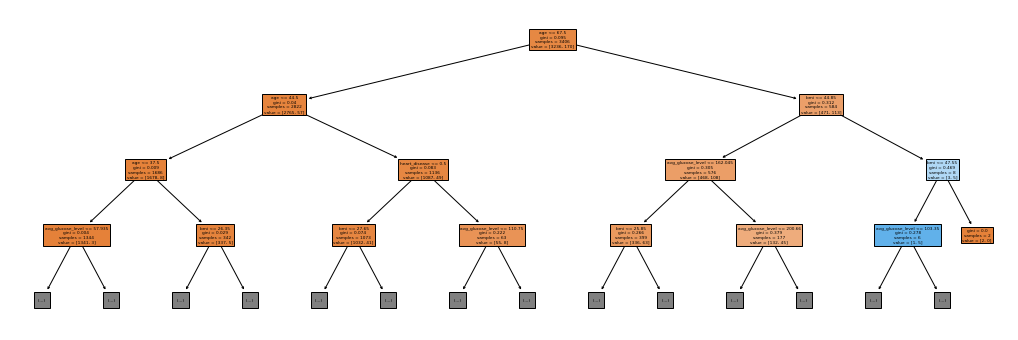

In [ ]:
plt.figure(figsize=(18, 6))
plot_tree(model_dt, feature_names=numeric_vars, max_depth=3, filled=True);

- Stampiamo il punteggio del modello.
  - Sia sulle variabili di training numeriche.
  - Sia sulle variabili di validation numeriche.

In [ ]:
model_dt.score(X_train_num, y_train)

0.9530240751614797

In [ ]:
X_val_cat = X_val[categorical_vars]
X_val_num = X_val[numeric_vars]

In [ ]:
model_dt.score(X_val_num, y_val)

0.9530516431924883

## K-Cross e Grid Search II

### Decision Tree

- Aggiungiamo ad un modello **Decision Tree** una **grid search** su **SkF**.
- Addestriamo i modelli.

In [ ]:
model_dt = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric", ..., numeric_vars),
        ("categorical", OneHotEncoder(), categorical_vars)
    ])),
    ("tree", DecisionTreeClassifier(random_state=42))
])
grid_dt = {
    "preproc__numeric": ["drop", "passthrough"],
    "tree__max_depth": [5, 10, None],
    "tree__min_samples_split": [2, 50, 100]
}
gs_dt = GridSearchCV(model_dt, grid_dt, cv=skf)
gs_dt.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preproc',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric',
                                                                         Ellipsis,
                                                                         ['age',
                                                                          'hypertension',
                                                                          'heart_disease',
                                                          

- Stampiamo i parametri del miglior modello ottenuto.

In [ ]:
gs_dt.best_params_

{'preproc__numeric': 'passthrough',
 'tree__max_depth': None,
 'tree__min_samples_split': 2}

- Stampiamo anche il punteggio del miglior modello.

In [ ]:
gs_dt.score(X_val, y_val)

0.8838028169014085

- Siamo arrivati ad ottenere un punteggio del **88% Tramite l'utilizzo di un Decision Tree.**

### Random Forest

- Importiamo le librerie necessarie.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import math

- Definiamo il modello e (ridefiniamo) i paramentri.

In [ ]:
forest_model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric", ..., numeric_vars),
        ("categorical", OneHotEncoder(), categorical_vars)
    ])),
    ("forest", RandomForestClassifier(n_jobs=-1, random_state=42))
])

forest_grid = {
             'preproc__numeric': ["drop", "passthrough"],
             'forest__n_estimators': range(5, 10),
             'forest__min_samples_split': range(2, 5), 
             'forest__max_depth': [None] + [i for i in range(1, 3)]
             }

gs_rf = GridSearchCV(forest_model, forest_grid, cv=skf)
gs_rf.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preproc',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric',
                                                                         Ellipsis,
                                                                         ['age',
                                                                          'hypertension',
                                                                          'heart_disease',
                                                          

- Stampiamo i parametri del miglior modello ottenuto.

In [ ]:
gs_rf.best_params_

{'forest__max_depth': None,
 'forest__min_samples_split': 4,
 'forest__n_estimators': 9,
 'preproc__numeric': 'passthrough'}

- Ed il suo punteggio.

In [ ]:
gs_rf.score(X_val, y_val)

0.9043427230046949

### XGB

- Definiamo gli import necessari

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

- Defiamo il modello e i parametri.

In [ ]:
std_xgb = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric", ..., numeric_vars),
        ("categorical", OneHotEncoder(), categorical_vars)
    ])),
    ('xgb', XGBClassifier(nthread=8, objective='binary:logistic'))
])

parameters = {
    'preproc__numeric': ["drop", "passthrough"],
    'xgb__eta': [0.002, 0.1, 0.5],
    'xgb__max_depth': [6],
    'xgb__n_estimators': [150, 300],
    'xgb__alpha': [0.0001, 0.001]
}

xgb_gs = GridSearchCV(std_xgb, parameters, cv=skf)
xgb_gs.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preproc',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric',
                                                                         Ellipsis,
                                                                         ['age',
                                                                          'hypertension',
                                                                          'heart_disease',
                                                          

- Stampiamo i parametri del migliore ottenuto.

In [ ]:
xgb_gs.best_params_

{'preproc__numeric': 'passthrough',
 'xgb__alpha': 0.0001,
 'xgb__eta': 0.002,
 'xgb__max_depth': 6,
 'xgb__n_estimators': 300}

- Stampiamo anche il suo punteggio.

In [ ]:
xgb_gs.score(X_val, y_val)

0.937206572769953

## Valutazione dei Modelli con calcolo degli Intervalli di confidenza fissati al 95%

- Creo la funzione per Calcolare l'intervallo di Confidenza al 95%.

In [ ]:
def conf_interval(a, N, Z=1.96): # 1 - = 0.95 ( =0.05), Z = 1.96 
  c = (2 * N * a + Z**2) / (2 * (N + Z**2))
  d = Z * np.sqrt(Z**2 + 4*N*a - 4*N*a**2) / (2 * (N + Z**2)) 
  return c - d, c + d


In [ ]:
from scipy.stats import norm
def model_conf_interval(model, X, y, level=0.95):
  a = model if type(model) == float else model.score(X, y) 
  N = len(X)
  Z = norm.ppf((1 + level) / 2)
  return conf_interval(a, N, Z)

- Stampo tutti gli intervalli di confidenza dei precedenti modelli.

In [ ]:
model_conf_interval(model_p, X_val, y_val)#perceptron

(0.7138698789209629, 0.755728745622208)

In [ ]:
model_conf_interval(model_en, X_val, y_val)#elastic net

(0.7415375770248268, 0.7819302164185581)

In [ ]:
model_conf_interval(gs, X_val, y_val)#Logistic Regression con Grid

(0.822222679125673, 0.8569972765726788)

In [ ]:
model_conf_interval(gs_dt, X_val, y_val)# DecisionTree con Grid

(0.8677165608364834, 0.8981624926578649)

In [ ]:
model_conf_interval(gs_rf, X_val, y_val)# Random Forest con Grid

(0.8894543967934043, 0.9174120678206721)

In [ ]:
model_conf_interval(xgb_gs, X_val, y_val)# XGB con Grid

(0.9246758796331986, 0.9477704427724427)

- Si può osservare che l'intervallo di confidenza migliore si ottiene con il modello:<br>
  **XGB**



## Analisi del miglior Modello

- Prima proviamo velocemente l'accuratezza di un modello casuale, tramite **DummyClassifier**.

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
random = DummyClassifier(strategy="uniform", random_state=42)
random.fit(X_train_sm, y_train_sm)

random.score(X_val, y_val)

0.4988262910798122

- Naturalmente **tutti i precedenti** sono **migliori** di un Modello Casuale.

Detto ciò, analizzo il mio dataset:<br>
Come è facile da capire il Dataset è molto complesso da prevedere.
- Tratta un argomento molto delicato, che segna la morte di 240mila persone solo in Italia.
- Purtroppo ad oggi nessuno sa da cosa sia causato e come lo si possa evitare.
- Ad oggi anche avendo uno stile di vita sano e con l'utilizzo di farmaci non riusciamo ad evitare il problema.
- Con questo Progetto ho voluto cercare il miglior modello che meglio poteva categorizzare la situazione;<br>
Questi modelli analizzavano le diverse feature e, decidendone la loro importanza,prendevano una decisione di classificazione (1/0).
- Il risultato che ho ottenuto può essere cosiderato molto Buono in confronto al Problema.

- Osseviamo anche il punteggio proveniente dai dati, ottenuto dai 2 migliori modelli trovati.

Dunque i migliori modelli sono **XGB** e **Random Forest**.

- Osserviamo la predizione con una Matrice di Confusione, Score, Precision, Recall, F1 score.

In [ ]:
y_pred = gs_rf.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print("RANDOM FOREST")
pd.DataFrame(cm, columns = gs_rf.classes_, index = gs_rf.classes_) #Matrice di confusione

RANDOM FOREST


0   1
0  1526  99
1    64  15

In [ ]:
print ("Random Forest:",
       "\nScore: \t\t", gs_rf.score(X_val, y_val),
       "\nPrecision score:", precision_score(y_val, y_pred, average=None), 
       "\nRecall score: \t", recall_score(y_val, y_pred, average=None),
       "\nF1 score: \t", f1_score(y_val, y_pred, average=None),
       "\nF1 mean: \t", f1_score(y_val, y_pred, average="macro"))

Random Forest: 
Score: 		 0.9043427230046949 
Precision score: [0.95974843 0.13157895] 
Recall score: 	 [0.93907692 0.18987342] 
F1 score: 	 [0.94930016 0.15544041] 
F1 mean: 	 0.5523702850143837


- in confronto a...

In [ ]:
y_pred = xgb_gs.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print("XGB")
pd.DataFrame(cm, columns = xgb_gs.classes_, index = xgb_gs.classes_) #Matrice di confusione

XGB


0   1
0  1589  36
1    71   8

In [ ]:
print ("XGB:", 
       "\nScore: \t\t", xgb_gs.score(X_val, y_val),
       "\nPrecision score:", precision_score(y_val, y_pred, average=None), 
       "\nRecall score: \t", recall_score(y_val, y_pred, average=None),
       "\nF1 score: \t", f1_score(y_val, y_pred, average=None),
       "\nF1 mean: \t", f1_score(y_val, y_pred, average="macro"))

XGB: 
Score: 		 0.937206572769953 
Precision score: [0.95722892 0.18181818] 
Recall score: 	 [0.97784615 0.10126582] 
F1 score: 	 [0.9674277 0.1300813] 
F1 mean: 	 0.5487545012436426


- Come visto prima, possiamo dire che **XGB** è in generale **il miglior modello** tra quelli testati;<br>
- Possiamo, però, notare che anche se entrambi fanno fatica ad essere sicuri di categorizzare un Infarto Certo.
  - Random Forest ha categorizzato giustamente più Ictus come 1 (VeriPositivi).
  - Dunque i veri positivi vengono indovinati meglio da RandomForest.